# K-Means

K-means is one of popular clustering algorithms. The main goal is to find objects that have similarity and group these into $k$ clusters. In this lesson, you will learn how to develop clustering model based on K-means algorithm using Scikit-learn library. 

## Prepare the dataset


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(f"Total records: {len(iris.data)}")

Total records: 150


In [5]:
# convert into dataframe

X = iris.data
y = iris.target
features = iris.feature_names
species = [iris.target_names[i] for i in y]

df = pd.DataFrame(X, columns = features)
df['species'] = species
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


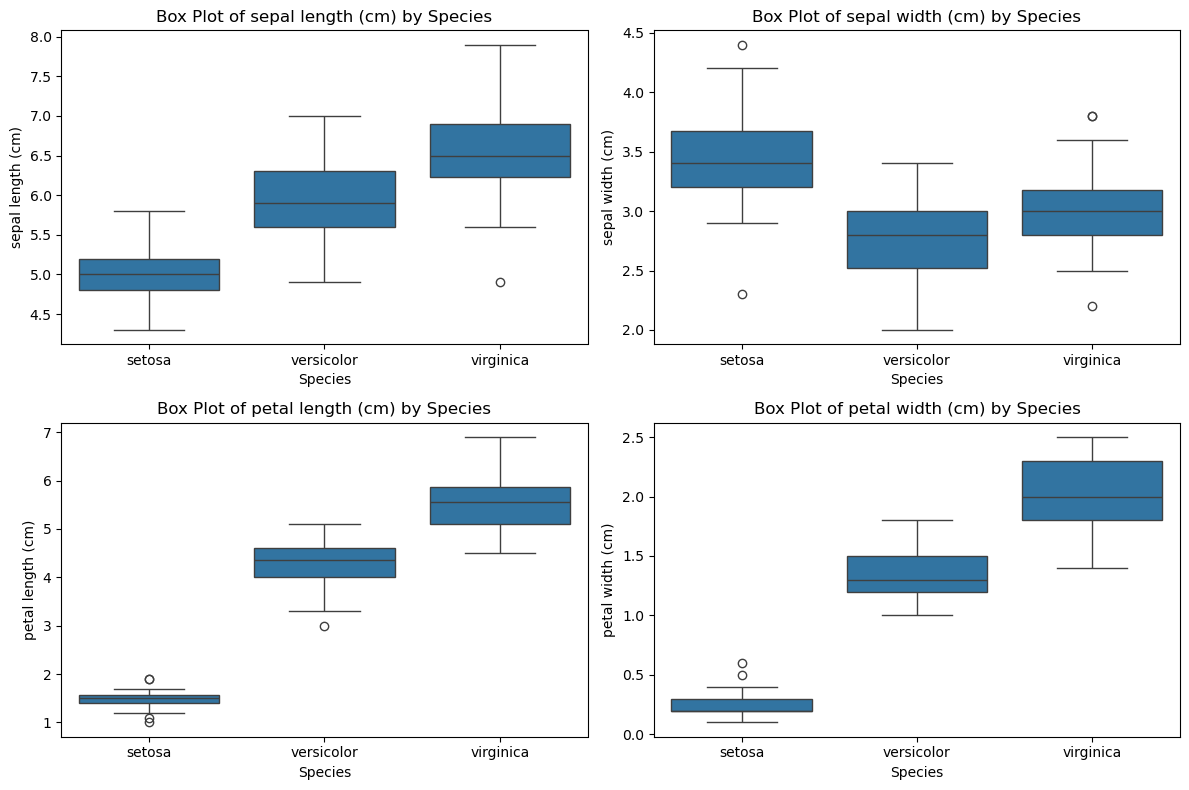

In [6]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f"Box Plot of {feature} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Fit models

In [7]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": 42,
}

# start with 2 clusters
km = KMeans(n_clusters=2, **common_params)
km.fit(X)

y_pred = km.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

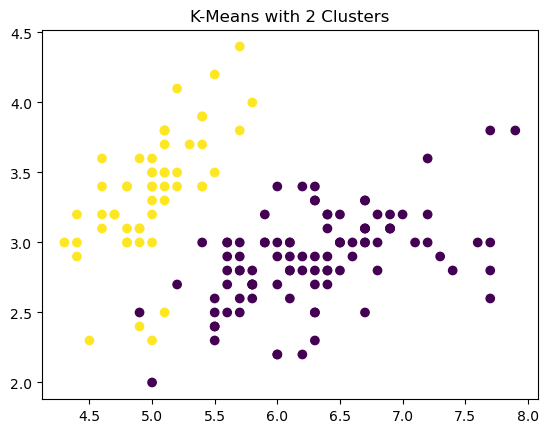

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-Means with 2 Clusters")
plt.show()

## Evaluate the model

In [9]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_pred)
score

0.6810461692117462

In [10]:
# Calculate WCSS (Within-Cluster Sum of Squares) for Elbow method
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

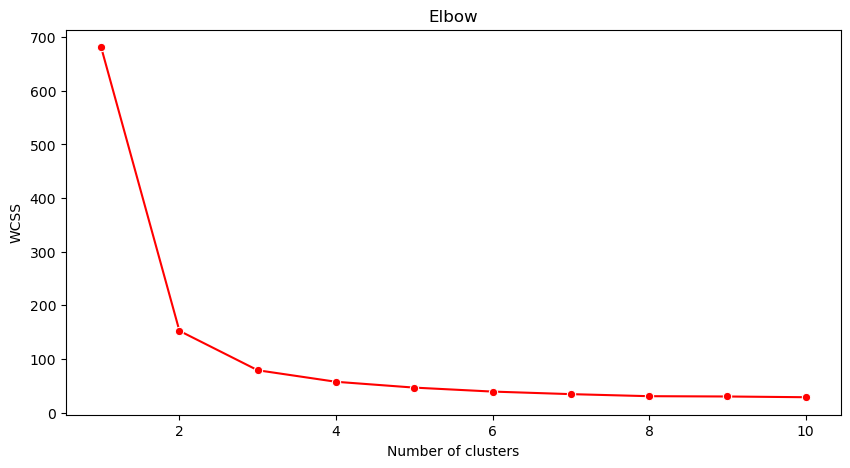

In [11]:
# plot elbow score
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# fit model with 3 clusters
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

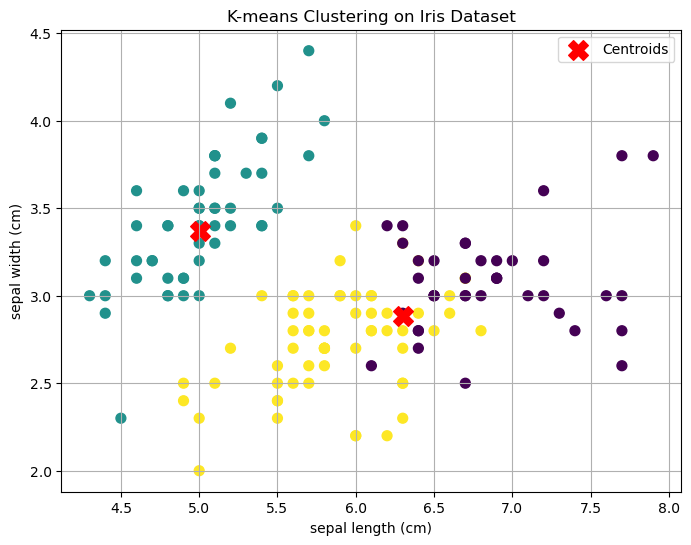

In [13]:
# add a cluster column to dataframe
df['cluster'] = y_pred

# plot cluster results based on sepal features
plt.figure(figsize=(8, 6))
plt.scatter(df[features[0]], df[features[1]], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("K-means Clustering on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df['cluster'] = y_pred

# plot cluster results based on petal features
plt.figure(figsize=(8, 6))
plt.scatter(df[features[2]], df[features[3]], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title("K-means Clustering on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()


## Cluster with selected features

In [14]:
# use Sepal length and sepal width features only

X_sepal = iris.data[:, :2]  
feature_names = iris.feature_names[:2]

km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(X_sepal)

y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

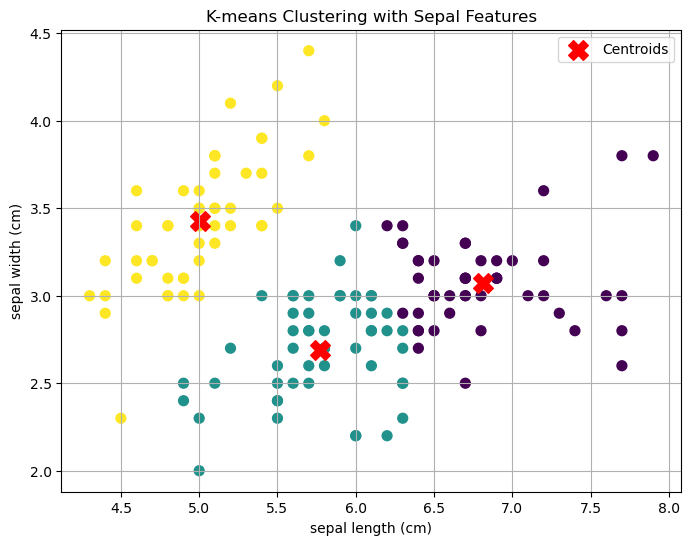

In [15]:
# create dataframe
newDf = pd.DataFrame(X_sepal, columns=feature_names)
newDf['cluster'] = y_pred

# plot cluster results based on sepal features
plt.figure(figsize=(8, 6))
plt.scatter(newDf[feature_names[0]], newDf[feature_names[1]], c=newDf['cluster'], cmap='viridis', s=50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("K-means Clustering with Sepal Features")
plt.legend()
plt.grid(True)
plt.show()